In [1]:
#import necessary Libraries...

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning) 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, \
roc_curve, auc, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
plt.style.use('fivethirtyeight')
from sklearn.cluster import AgglomerativeClustering as AC
plt.style.use('seaborn')
import os
%matplotlib inline

#### What is the shape of the files?

In [2]:
crimes  = pd.read_csv('CleandedCrimes.csv')
crimes2  = pd.read_csv('crimes_With_dummies.csv')
print("The shape of cleaned crimes files is : ", crimes.shape)
print("The shape of crimes with dummies files is : ", crimes2.shape)


The shape of cleaned crimes files is :  (1456599, 31)
The shape of crimes with dummies files is :  (1456599, 75)


#### What are the columns we have?

In [3]:
crimes.columns

Index(['Unnamed: 0', 'Date', 'Block', 'PrimaryType', 'Description',
       'LocationDescription', 'Arrest', 'Domestic', 'Beat', 'Ward',
       'CommunityArea', 'Updated On', 'Latitude', 'Longitude', 'CommunityName',
       'AverageIncome', 'Population', 'TotalHouseholds', 'HouseholdsSize',
       'MedianAge', 'BachelorDegree', 'Employed', 'Unemployed', 'Time',
       'DayCycle', 'Year', 'Month', 'Day', 'DayofWeek', 'AM', 'PM'],
      dtype='object')

In [4]:
crimes2.columns

Index(['Unnamed: 0', 'Date', 'Block', 'PrimaryType', 'Description',
       'LocationDescription', 'Arrest', 'Domestic', 'Beat', 'Ward',
       'CommunityArea', 'Updated On', 'Latitude', 'Longitude', 'CommunityName',
       'AverageIncome', 'Population', 'TotalHouseholds', 'HouseholdsSize',
       'MedianAge', 'BachelorDegree', 'Employed', 'Unemployed', 'Time',
       'DayCycle', 'Year', 'Month', 'Day', 'DayofWeek', 'AM', 'PM',
       'Demostic_no', 'Demostic_yes', 'ARSON', 'ASSAULT', 'BATTERY',
       'BURGLARY', 'CONCEALED_CARRY_LICENSE_VIOLATION', 'CRIMS_SEXUAL_ASSAULT',
       'CRIMINAL_DAMAGE', 'CRIMINAL_TRESPASS', 'DECEPTIVE_PRACTICE',
       'GAMBLING', 'HOMICIDE', 'HUMAN_TRAFFICKING',
       'INTERFERENCE_WITH_PUBLIC_OFFICER', 'INTIMIDATION', 'KIDNAPPING',
       'LIQUOR_LAW_VIOLATION', 'MOTOR_VEHICLE_THEFT', 'NARCOTICS',
       'NON_CRIMINAL', 'OBSCENITY', 'OFFENSE_INVOLVING_CHILDREN',
       'OTHER_NARCOTIC_VIOLATION', 'OTHER_OFFENSE', 'PROSTITUTION',
       'PUBLIC_INDECENCY'

In [5]:
# To facilitate the EDA Process we set (Date) columns as an index
crimes.index = pd.DatetimeIndex(crimes.Date)

In [6]:
#This function well be used later for drawing Heatmaps
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

# 1- When

#### ---What is the number of crimes over Years from (2012, 2016)?

### Year

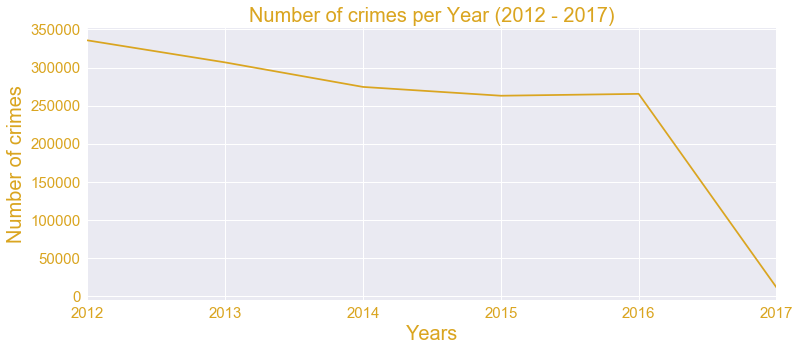

In [7]:
plt.figure(figsize=(11,5))
crimes.resample('A').size().plot(legend=False, color = 'goldenrod')
plt.title('Number of crimes per Year (2012 - 2017)', color = 'goldenrod', size = 20)
plt.xlabel('Years', color = 'goldenrod', size = 20)
plt.ylabel('Number of crimes', color = 'goldenrod', size = 20)
plt.xticks(color = 'goldenrod', size = 15)
plt.yticks(color = 'goldenrod', size = 15)
plt.show()

#### *** It seems that the number of crimes decreases over the time (Except in 2016 is higher than 2015 in terms of the number of the crimes

###### ---What is the number of each crime over Years from (2012, 2016)?# The number of each crime over the years 

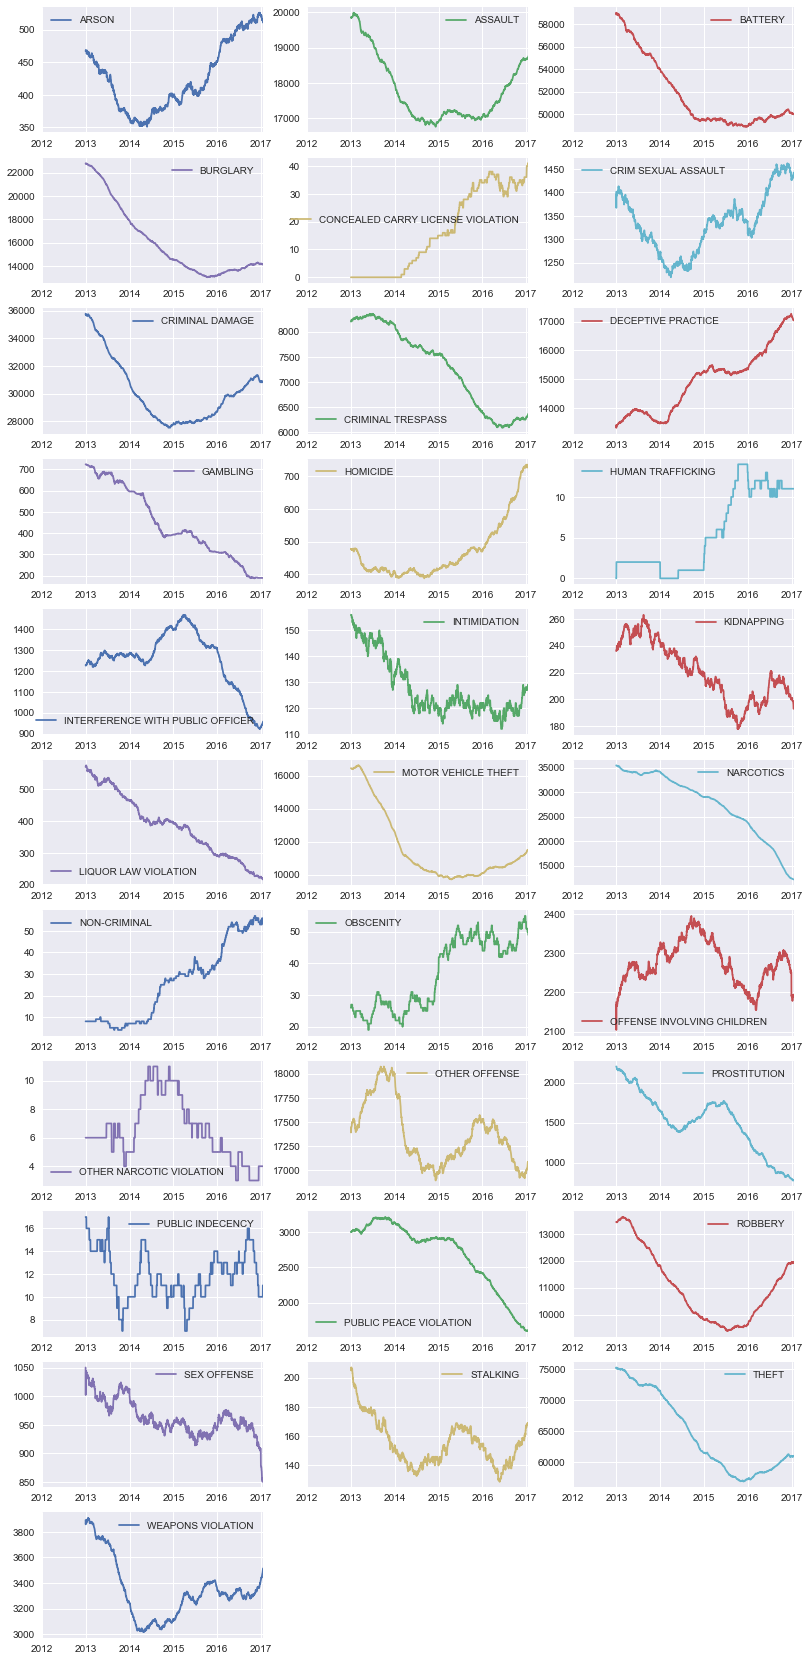

In [8]:
crimes_count_date = crimes.pivot_table('Date', aggfunc=np.size, columns='PrimaryType', index=crimes.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)
plt.title('The Number of each crime over the Years from 2012 to 2017', color='goldenrod', size= 20)
plt.xticks(color = 'goldenrod', size = 15)
plt.yticks(color = 'goldenrod', size = 15)
plt.show()

#### ***There is some crimes increase over the year, such as DECEPTIVE PRACTICE.. While others decrease, such as Narcotics

#### ---What is the number of crimes in each Quarter?

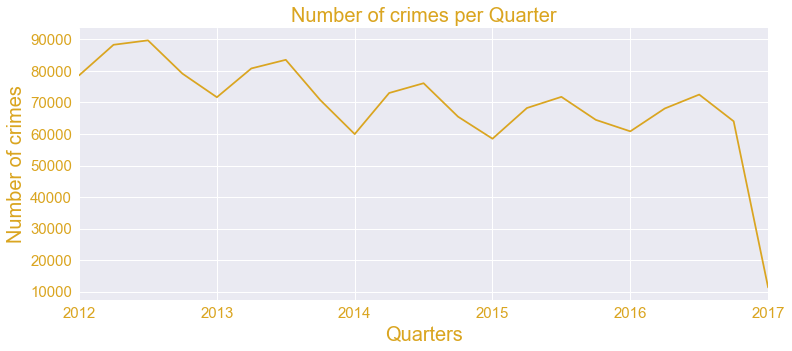

In [9]:
plt.figure(figsize=(11,5))
crimes.resample('Q').size().plot(legend=False, color = 'goldenrod')
plt.title('Number of crimes per Quarter', color = 'goldenrod', size = 20)
plt.xlabel('Quarters', color = 'goldenrod', size = 20)
plt.ylabel('Number of crimes', color = 'goldenrod', size = 20)
plt.xticks(color = 'goldenrod', size = 15)
plt.yticks(color = 'goldenrod', size = 15)
plt.show()

#### *** It seems that the number of crime is always higher in the Third quarter in every year in our sample

#### ---What is the number of crimes in each month??

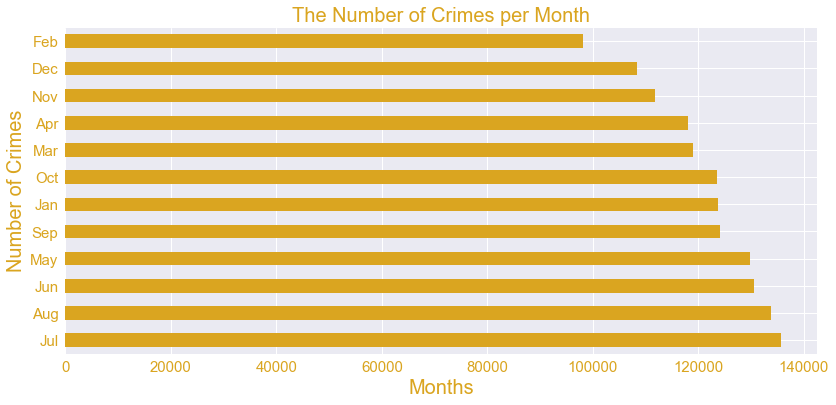

In [10]:
Months = {
    1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"
}
MonthsIndex = list(crimes.groupby('Month').size().sort_values(ascending=False).index)
crimes.groupby('Month').size().sort_values(ascending=False).plot(kind= 'barh', color = 'goldenrod', figsize =(12,6))
plt.xlabel('Months', color = 'goldenrod', size = 20)
plt.ylabel('Number of Crimes', color = 'goldenrod', size = 20)
plt.title('The Number of Crimes per Month', color = 'goldenrod', size = 20)
plt.yticks(np.arange(12), (Months[MonthsIndex[0]],Months[MonthsIndex[1]],Months[MonthsIndex[2]],Months[MonthsIndex[3]],Months[MonthsIndex[4]],Months[MonthsIndex[5]],Months[MonthsIndex[6]],Months[MonthsIndex[7]],Months[MonthsIndex[8]],Months[MonthsIndex[9]],Months[MonthsIndex[10]],Months[MonthsIndex[11]]), color = 'goldenrod', size = 15)
plt.xticks(color = 'goldenrod', size = 15)
plt.show()

####  ***it seems that the number of crimes increases in the summer time (July, August, June) 

#### ---What is the number of crimes for the days of a month?

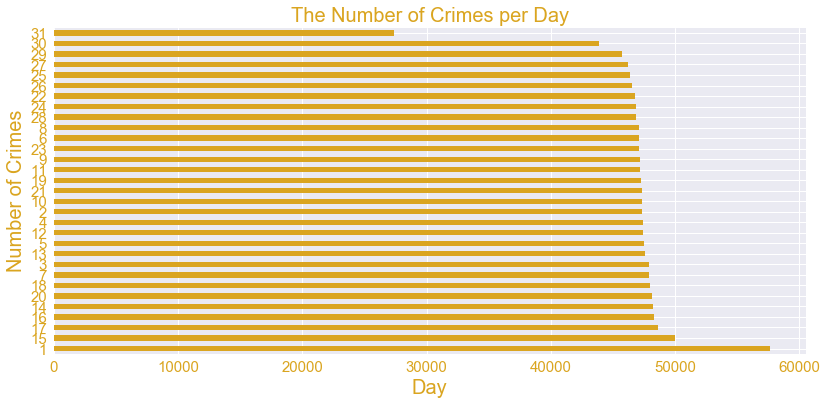

In [11]:
crimes.groupby('Day').size().sort_values(ascending=False).plot(kind= 'barh', color = 'goldenrod', figsize =(12,6))
plt.xlabel('Day', color = 'goldenrod', size = 20)
plt.ylabel('Number of Crimes', color = 'goldenrod', size = 20)
plt.title('The Number of Crimes per Day', color = 'goldenrod', size = 20)
plt.xticks(color = 'goldenrod', size = 15)
plt.yticks(color = 'goldenrod', size = 15)
plt.show()

#### *** The number of crimes incrase in the first day of the month (we will explore more about the type of the crimes in that day to know the reasons why this day has more crimes than other ). Also, the number of crimes increase in the middle of the month...

#### >>> What type of crimes happened in the first day?

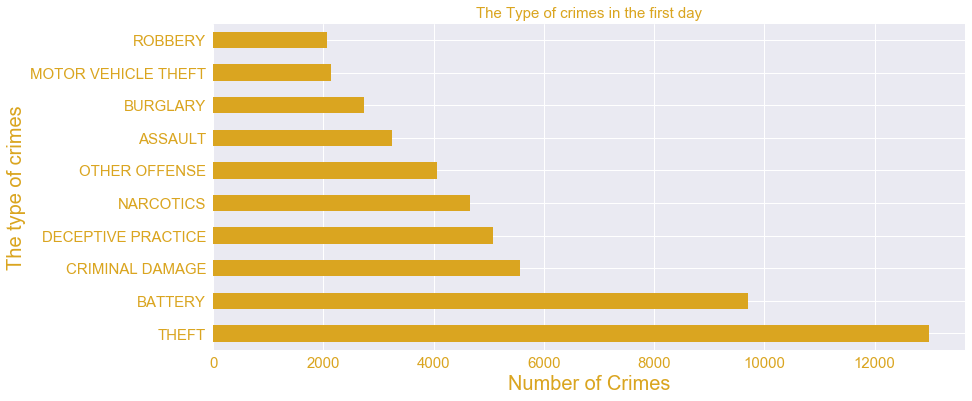

In [12]:
crimes[crimes['Day']==1].PrimaryType.value_counts().head(10).plot(kind= 'barh', color = 'goldenrod', figsize =(12,6))
plt.ylabel('The type of crimes',  color = 'goldenrod', size= 20)
plt.xlabel('Number of Crimes' , color = 'goldenrod', size= 20)
plt.title('The Type of crimes in the first day',color = 'goldenrod', size = 15)
plt.xticks(color = 'goldenrod', size = 15)
plt.yticks(color = 'goldenrod', size = 15)
plt.show()

#### ---What is the number of crimes for the days of a week?

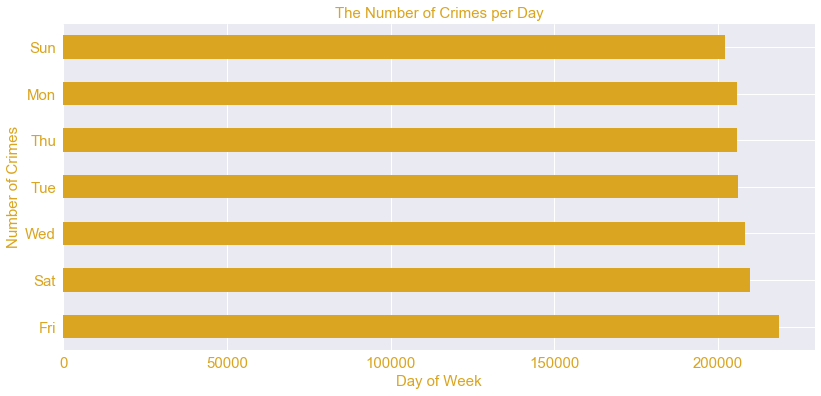

In [13]:
Days = {
    0:"Mon", 1:"Tue", 2:"Wed", 3:"Thu", 4:"Fri", 5:"Sat",6:"Sun"
}
DaysIndex = list(crimes.groupby('DayofWeek').size().sort_values(ascending=False).index)
crimes.groupby('DayofWeek').size().sort_values(ascending=False).plot(kind= 'barh', color = 'goldenrod', figsize =(12,6))
plt.xlabel('Day of Week',color = 'goldenrod', size = 15)
plt.ylabel('Number of Crimes',color = 'goldenrod', size = 15)
plt.title('The Number of Crimes per Day',color = 'goldenrod', size = 15)
plt.xticks(color = 'goldenrod', size = 15)
plt.yticks(np.arange(7), (Days[DaysIndex[0]],Days[DaysIndex[1]],Days[DaysIndex[2]],Days[DaysIndex[3]],Days[DaysIndex[4]],Days[DaysIndex[5]],Days[DaysIndex[6]]), color = 'goldenrod', size = 15)
plt.show()

#### *** the number of crimes increases in weekends :) 

#### ---What is the number of crimes per period of the day?

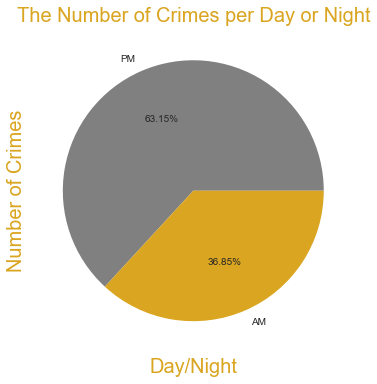

In [14]:
crimes.groupby(['DayCycle']).size().sort_values(ascending=False).plot.pie(figsize =(12,6), autopct = "%.2f%%",colors = ['gray', 'goldenrod'])
plt.xlabel('Day/Night', color= 'goldenrod', size = 20)
plt.ylabel('Number of Crimes', color= 'goldenrod', size = 20)
plt.title('The Number of Crimes per Day or Night', color= 'goldenrod', size = 20)
plt.xticks(color = 'goldenrod', size = 15)
plt.yticks(color = 'goldenrod', size = 15)
plt.show()

#### *** crimes increase at night

### Day Time

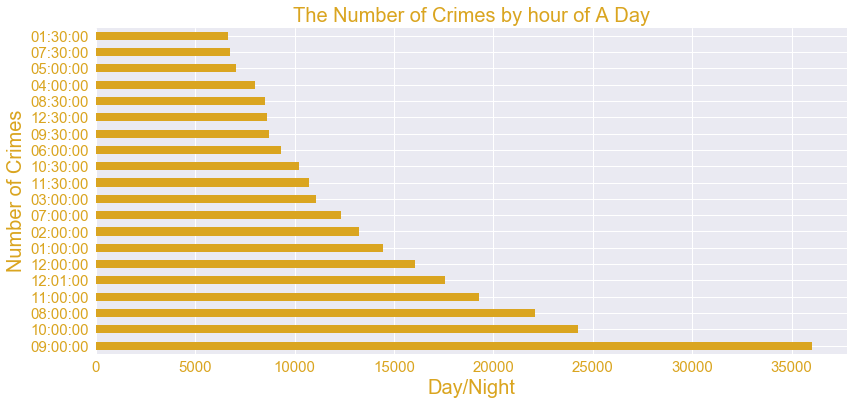

In [15]:
crimes[crimes['DayCycle']=='AM'].Time.value_counts().head(20).plot(kind= 'barh', color = 'goldenrod', figsize =(12,6))
plt.xlabel('Day/Night', color= 'goldenrod', size = 20)
plt.ylabel('Number of Crimes',color= 'goldenrod', size = 20)
plt.title('The Number of Crimes by hour of A Day', color= 'goldenrod', size = 20)
plt.xticks(color = 'goldenrod', size = 15)
plt.yticks(color = 'goldenrod', size = 15)
plt.show()

#### **** at a day time, the number of crimes increase in an morning time

### Night Time

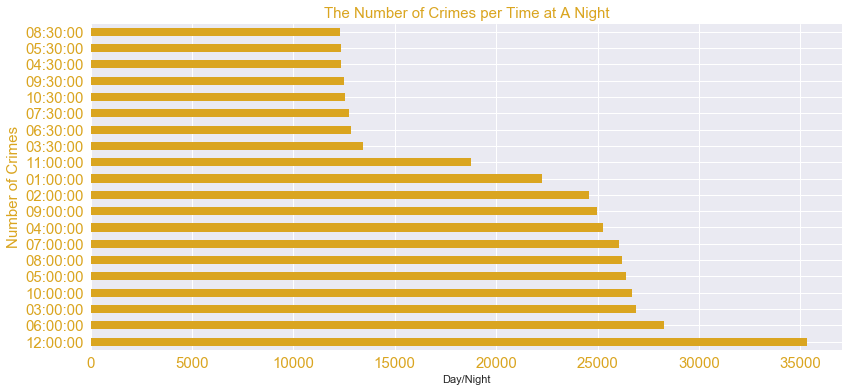

In [16]:
crimes[crimes['DayCycle']=='PM'].Time.value_counts().head(20).plot(kind= 'barh', color = 'goldenrod', figsize =(12,6))
plt.xlabel('Day/Night')
plt.ylabel('Number of Crimes', color = 'goldenrod', size = 15)
plt.title('The Number of Crimes per Time at A Night', color = 'goldenrod', size = 15)
plt.xticks(color = 'goldenrod', size = 15)
plt.yticks(color = 'goldenrod', size = 15)
plt.show()

#### **** at a day time, the number of crimes increase in the midnight time

## Where

#### *** it seems that the most frequent crimes occured in Chicago is Thift and Battery

## Where the most frequent crimes are happened?

### 1-  per community area..

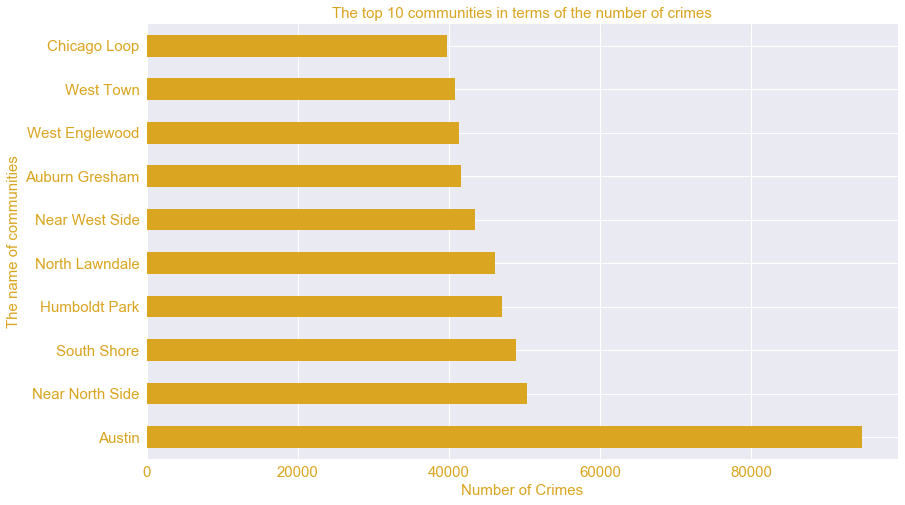

In [17]:
crimes.groupby('CommunityName').PrimaryType.count().sort_values(ascending=False).head(10).plot(kind='barh', figsize = (12,8), color='goldenrod')
plt.ylabel('The name of communities', color = 'goldenrod', size = 15)
plt.xlabel('Number of Crimes',color = 'goldenrod', size = 15)
plt.title('The top 10 communities in terms of the number of crimes',color = 'goldenrod', size = 15)
plt.xticks(color = 'goldenrod', size = 15)
plt.yticks(color = 'goldenrod', size = 15)
plt.show()

#### ***The highest community Area in terms of the number of crimes are Austin and then Near north side

### 2-  per location...

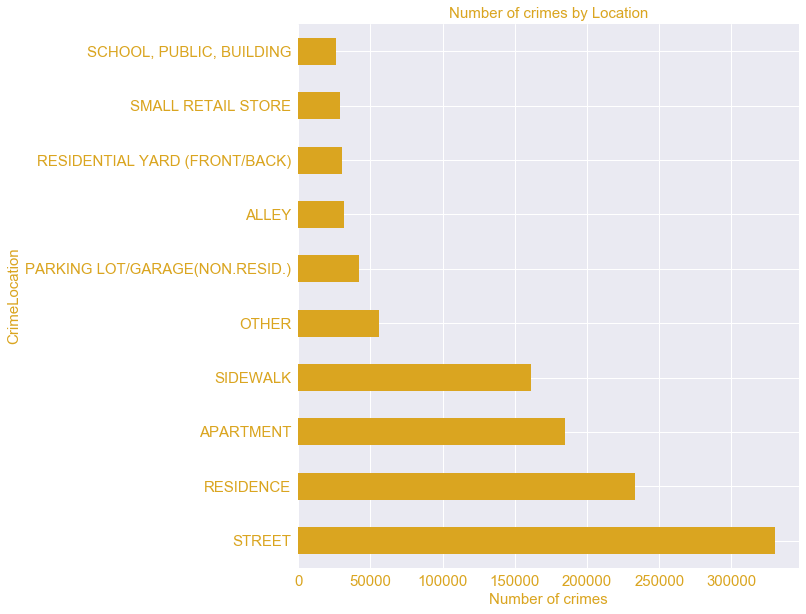

In [18]:
plt.figure(figsize=(8,10))
crimes.groupby([crimes['LocationDescription']]).size().sort_values(ascending=False).head(10).plot(kind='barh',  color = 'goldenrod')
plt.title('Number of crimes by Location', color = 'goldenrod', size = 15)
plt.ylabel('CrimeLocation', color = 'goldenrod', size = 15)
plt.xlabel('Number of crimes', color = 'goldenrod', size = 15)
plt.xticks(color = 'goldenrod', size = 15)
plt.yticks(color = 'goldenrod', size = 15)
plt.show()

### What is the frequency of a crime in the top 15 of location description?

## Explore the crimes types

### The most frequent type of crimes in Chicago from highest to lowest

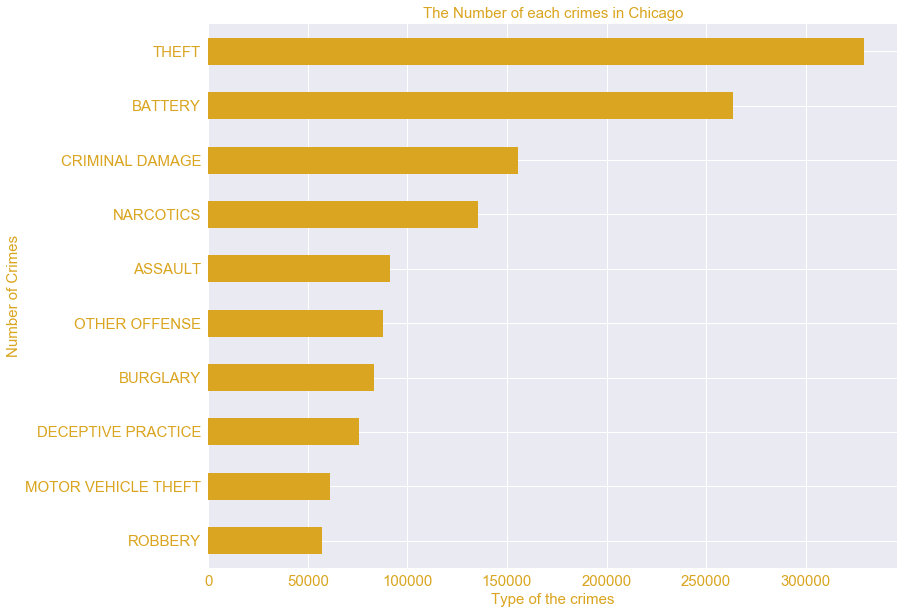

In [19]:
crimes.PrimaryType.value_counts().head(10).sort_values().plot(kind = 'barh' ,color='goldenrod', figsize = (11,10))
plt.xlabel('Type of the crimes', color = 'goldenrod', size = 15)
plt.ylabel('Number of Crimes',color = 'goldenrod', size = 15)
plt.title('The Number of each crimes in Chicago',color = 'goldenrod', size = 15)
plt.xticks(color = 'goldenrod', size = 15)
plt.yticks(color = 'goldenrod', size = 15)
plt.show()

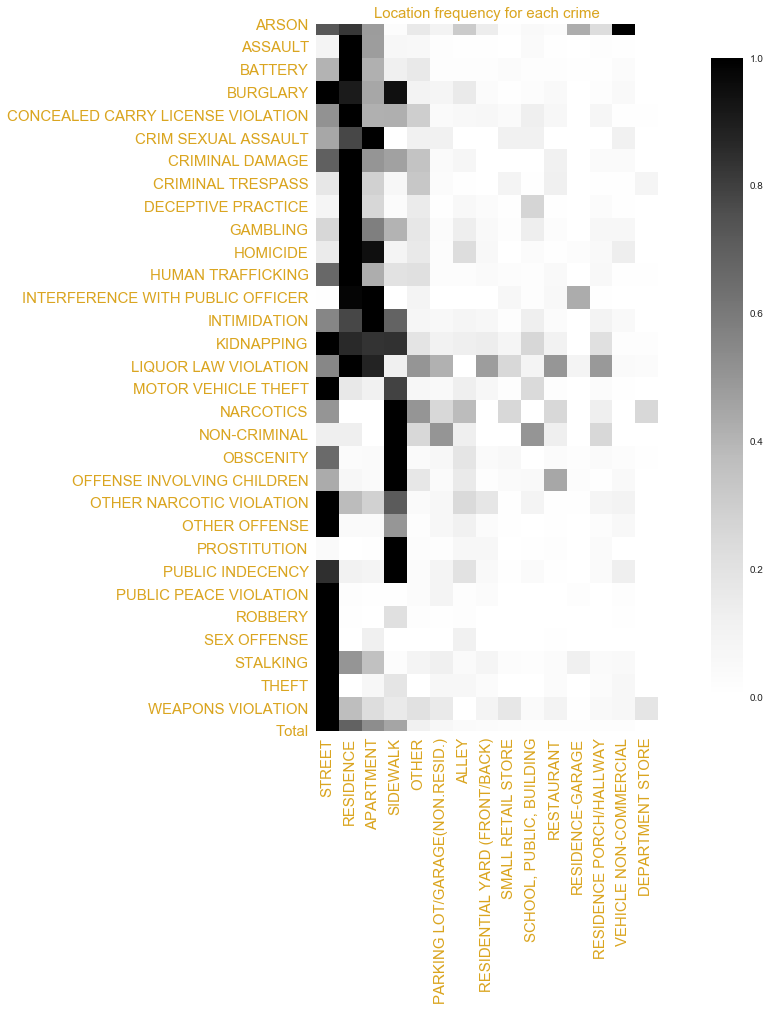

In [20]:
location_by_type  = crimes.pivot_table(values='Date', index='LocationDescription', columns='PrimaryType', aggfunc=np.size).fillna(0)
location_by_type['Total']= location_by_type['ARSON']+ location_by_type['ASSAULT'] +location_by_type['BATTERY']+ location_by_type['BURGLARY']+location_by_type['CONCEALED CARRY LICENSE VIOLATION']+ location_by_type['CRIM SEXUAL ASSAULT'] +location_by_type['CRIMINAL DAMAGE']+ location_by_type['CRIMINAL TRESPASS']+location_by_type['DECEPTIVE PRACTICE']+location_by_type['GAMBLING']+ location_by_type['HOMICIDE'] +location_by_type['HUMAN TRAFFICKING']+ location_by_type['INTERFERENCE WITH PUBLIC OFFICER']+location_by_type['INTIMIDATION']+ location_by_type['KIDNAPPING'] +location_by_type['LIQUOR LAW VIOLATION']+ location_by_type['MOTOR VEHICLE THEFT']+location_by_type['NARCOTICS']+location_by_type['NON-CRIMINAL']+location_by_type['OBSCENITY']+location_by_type['OFFENSE INVOLVING CHILDREN']+location_by_type['OTHER NARCOTIC VIOLATION']+location_by_type['OTHER OFFENSE']+location_by_type['PROSTITUTION']+location_by_type['PUBLIC INDECENCY']+location_by_type['PUBLIC PEACE VIOLATION']+location_by_type['ROBBERY']+location_by_type['SEX OFFENSE']+location_by_type['STALKING']+location_by_type['THEFT']+location_by_type['WEAPONS VIOLATION']
location_by_type2=location_by_type.sort_values(by = 'Total', ascending=False).head(15)
df = normalize(location_by_type2)
ix = AC(3).fit(df.T).labels_.argsort() # a trick to make better heatmaps
plt.figure(figsize=(17,13))
plt.imshow(df.T.iloc[ix,:], cmap='Greys')
plt.colorbar(fraction=0.03)
plt.xticks(np.arange(df.shape[0]), df.index, rotation='vertical',color = 'goldenrod', size = 15)
plt.yticks(np.arange(df.shape[1]), df.columns,color = 'goldenrod', size = 15)
plt.title('Location frequency for each crime',color = 'goldenrod', size = 15)
plt.grid(False)
plt.show()


### What is the frequency of a crime in the top 15 of community areas?

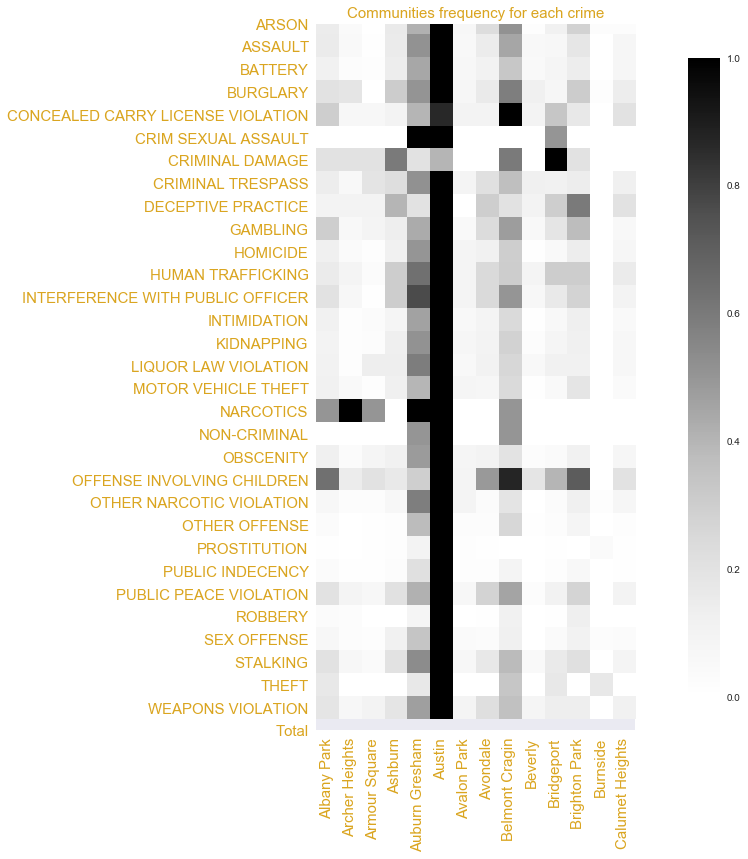

In [21]:
commuity_by_type  = crimes.pivot_table(values='Date', index='CommunityName', columns='PrimaryType', aggfunc=np.size).fillna(0)
commuity_by_type['Total']= location_by_type['ARSON']+ location_by_type['ASSAULT'] +location_by_type['BATTERY']+ location_by_type['BURGLARY']+location_by_type['CONCEALED CARRY LICENSE VIOLATION']+ location_by_type['CRIM SEXUAL ASSAULT'] +location_by_type['CRIMINAL DAMAGE']+ location_by_type['CRIMINAL TRESPASS']+location_by_type['DECEPTIVE PRACTICE']+location_by_type['GAMBLING']+ location_by_type['HOMICIDE'] +location_by_type['HUMAN TRAFFICKING']+ location_by_type['INTERFERENCE WITH PUBLIC OFFICER']+location_by_type['INTIMIDATION']+ location_by_type['KIDNAPPING'] +location_by_type['LIQUOR LAW VIOLATION']+ location_by_type['MOTOR VEHICLE THEFT']+location_by_type['NARCOTICS']+location_by_type['NON-CRIMINAL']+location_by_type['OBSCENITY']+location_by_type['OFFENSE INVOLVING CHILDREN']+location_by_type['OTHER NARCOTIC VIOLATION']+location_by_type['OTHER OFFENSE']+location_by_type['PROSTITUTION']+location_by_type['PUBLIC INDECENCY']+location_by_type['PUBLIC PEACE VIOLATION']+location_by_type['ROBBERY']+location_by_type['SEX OFFENSE']+location_by_type['STALKING']+location_by_type['THEFT']+location_by_type['WEAPONS VIOLATION']
commuity_by_type2=commuity_by_type.sort_values(by = 'Total', ascending=False).head(15)
commuity_by_type2 = commuity_by_type2[commuity_by_type2.index!= '0']
df = normalize(commuity_by_type2)
#ix = AC(3).fit(df.T).labels_.argsort() # a trick to make better heatmaps
plt.figure(figsize=(17,13))
plt.imshow(df.T.iloc[ix,:], cmap='Greys')
plt.colorbar(fraction=0.03)
plt.xticks(np.arange(df.shape[0]), df.index, rotation='vertical', color = 'goldenrod', size = 15)
plt.yticks(np.arange(df.shape[1]), df.columns, color = 'goldenrod', size = 15)
plt.title('Communities frequency for each crime',color = 'goldenrod', size = 15)
plt.grid(False)
plt.show()


### What is the rate of Arrested crminal Vs non arrested?

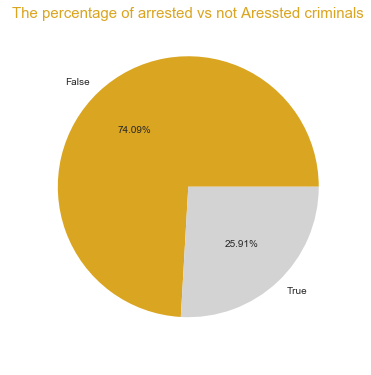

In [22]:
crimes.Arrest.value_counts().plot.pie(figsize =(12,6), autopct = "%.2f%%",colors = ['goldenrod', 'lightgray'])
plt.xlabel(" ", color = 'goldenrod', size = 15)
plt.ylabel(" ",color = 'goldenrod', size = 15)
plt.title('The percentage of arrested vs not Aressted criminals',color = 'goldenrod', size = 15)
plt.xticks(color = 'goldenrod', size = 15)
plt.yticks(color = 'goldenrod', size = 15)
plt.show()


### Arrested Status per year..

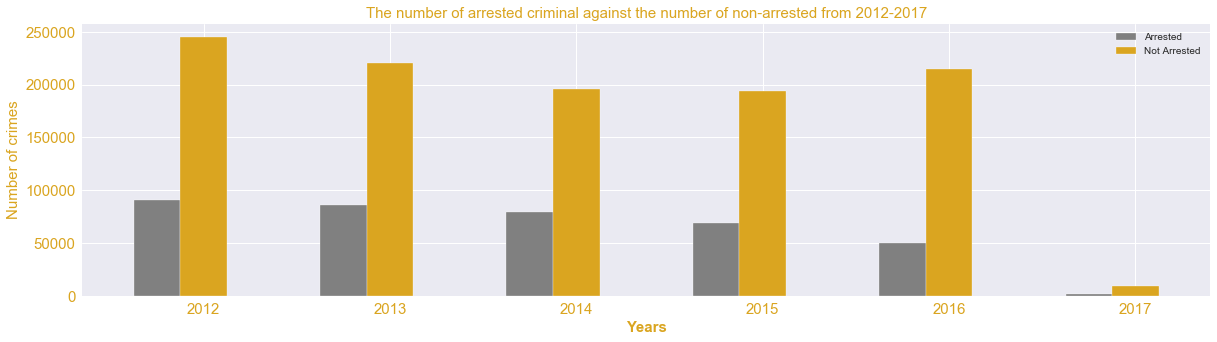

In [23]:
Arrested = list(crimes[crimes['Arrest']==True].groupby('Year').Arrest.count())
NotArrested= list(crimes[crimes['Arrest']==False].groupby('Year').Arrest.count())

barWidth =0.25
f, ax = plt.subplots(figsize=(18,5))
# Set position of bar on X axis
r1 = np.arange(len(Arrested))
r2 = [x + barWidth for x in r1]
plt.bar(r1, Arrested, color='gray', width=barWidth, edgecolor='white', label='Arrested')
plt.bar(r2, NotArrested, color='goldenrod', width=barWidth, edgecolor='white', label='Not Arrested')
# Add xticks on the middle of the group bars
plt.xlabel('Years', fontweight='bold',color = 'goldenrod', size = 15)
plt.ylabel('Number of crimes', color = 'goldenrod', size = 15)
plt.xticks([r + barWidth for r in range(len(Arrested))], ['2012', '2013', '2014', '2015', '2016','2017'],color = 'goldenrod', size = 15)
plt.yticks(color = 'goldenrod', size = 15)
plt.title('The number of arrested criminal against the number of non-arrested from 2012-2017',color = 'goldenrod', size = 15)
# Create legend & Show graphic
plt.legend()
plt.show()

### Arrested Status per month..

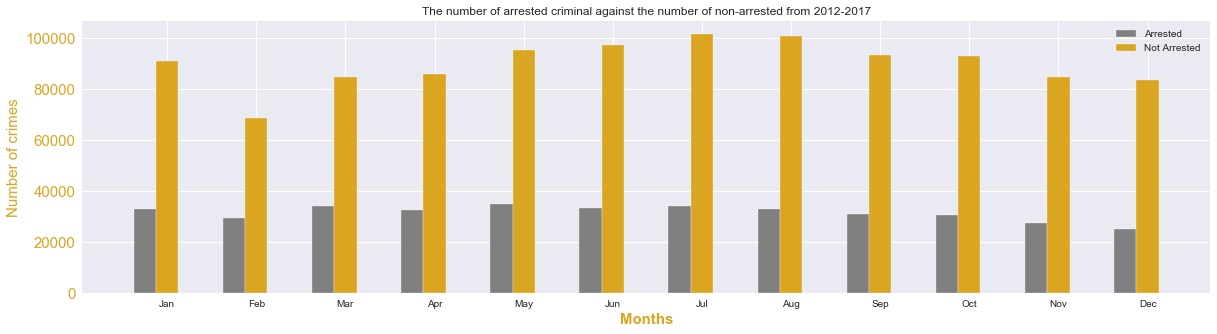

In [24]:

Arrested = list(crimes[crimes['Arrest']==True].groupby('Month').Arrest.count())
NotArrested= list(crimes[crimes['Arrest']==False].groupby('Month').Arrest.count())

barWidth =0.25
f, ax = plt.subplots(figsize=(18,5))
# Set position of bar on X axis
r1 = np.arange(len(Arrested))
r2 = [x + barWidth for x in r1]
plt.bar(r1, Arrested, color='gray', width=barWidth, edgecolor='white', label='Arrested')
plt.bar(r2, NotArrested, color='goldenrod', width=barWidth, edgecolor='white', label='Not Arrested')
# Add xticks on the middle of the group bars
plt.xlabel('Months', fontweight='bold',color = 'goldenrod', size = 15)
plt.ylabel('Number of crimes',color = 'goldenrod', size = 15)
plt.xticks([r + barWidth for r in range(len(Arrested))], ['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.yticks(color = 'goldenrod', size = 15)
plt.title('The number of arrested criminal against the number of non-arrested from 2012-2017')
# Create legend & Show graphic
plt.legend()
plt.show()


### Arrested Status per Day of the month..

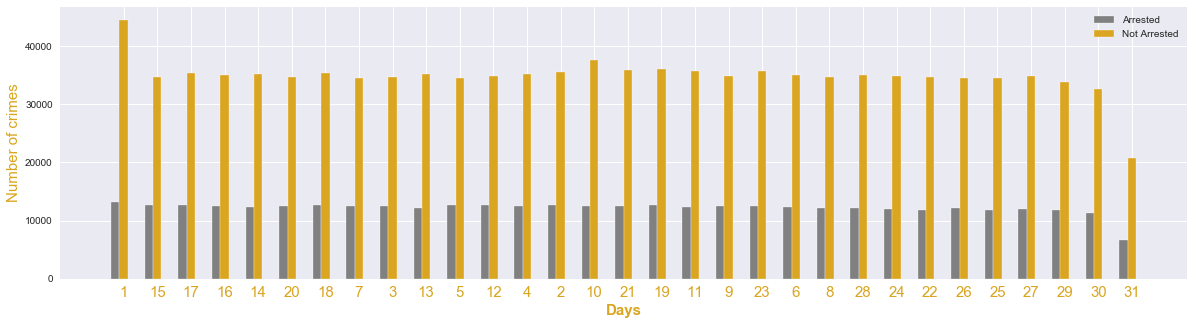

In [25]:
index= crimes.groupby('Day').size().sort_values(ascending=False).index
Arrested = list(crimes[crimes['Arrest']==True].groupby('Day').Arrest.count())
NotArrested= list(crimes[crimes['Arrest']==False].groupby('Day').Arrest.count())

barWidth =0.25
f, ax = plt.subplots(figsize=(18,5))
# Set position of bar on X axis
r1 = np.arange(len(Arrested))
r2 = [x + barWidth for x in r1]
plt.bar(r1, Arrested, color='gray', width=barWidth, edgecolor='white', label='Arrested')
plt.bar(r2, NotArrested, color='goldenrod', width=barWidth, edgecolor='white', label='Not Arrested')
plt.xlabel('Days', fontweight='bold',color = 'goldenrod', size = 15)
plt.ylabel('Number of crimes',color = 'goldenrod', size = 15)
plt.xticks([r + barWidth for r in range(len(Arrested))], index[:])
plt.xticks(color = 'goldenrod', size = 15)
# Create legend & Show graphic
plt.legend()
plt.show()

### Arrested status per day of the week 

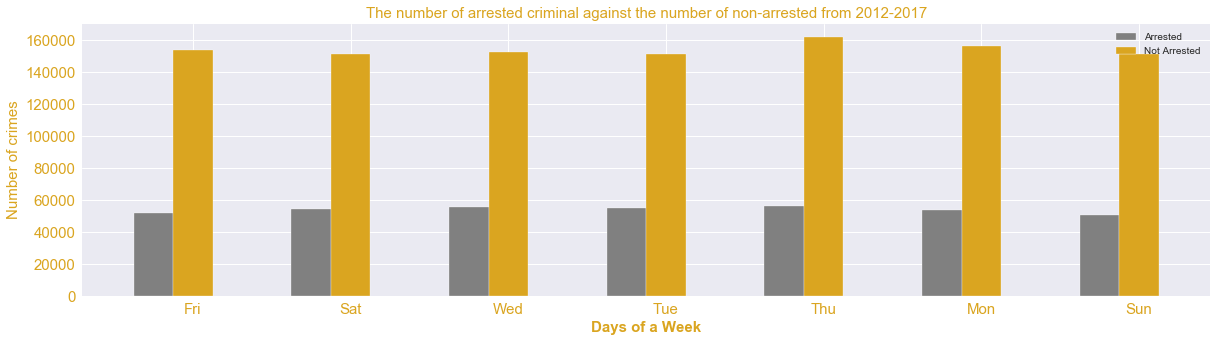

In [26]:

Arrested = list(crimes[crimes['Arrest']==True].groupby('DayofWeek').Arrest.count())
NotArrested= list(crimes[crimes['Arrest']==False].groupby('DayofWeek').Arrest.count())

barWidth =0.25
f, ax = plt.subplots(figsize=(18,5))
# Set position of bar on X axis
r1 = np.arange(len(Arrested))
r2 = [x + barWidth for x in r1]
plt.bar(r1, Arrested, color='gray', width=barWidth, edgecolor='white', label='Arrested')
plt.bar(r2, NotArrested, color='goldenrod', width=barWidth, edgecolor='white', label='Not Arrested')
plt.xlabel('Days of a Week', fontweight='bold', color= 'goldenrod', size= 15)
plt.ylabel('Number of crimes',  color= 'goldenrod', size= 15)
plt.xticks([r + barWidth for r in range(len(Arrested))], [Days[DaysIndex[0]],Days[DaysIndex[1]],Days[DaysIndex[2]],Days[DaysIndex[3]],Days[DaysIndex[4]],Days[DaysIndex[5]],Days[DaysIndex[6]]], color= 'goldenrod', size= 15)
plt.yticks(color= 'goldenrod', size= 15)
plt.title('The number of arrested criminal against the number of non-arrested from 2012-2017', color= 'goldenrod', size= 15)
# Create legend & Show graphic
plt.legend()
plt.show()


### Arrested status per community area,, the top (10)

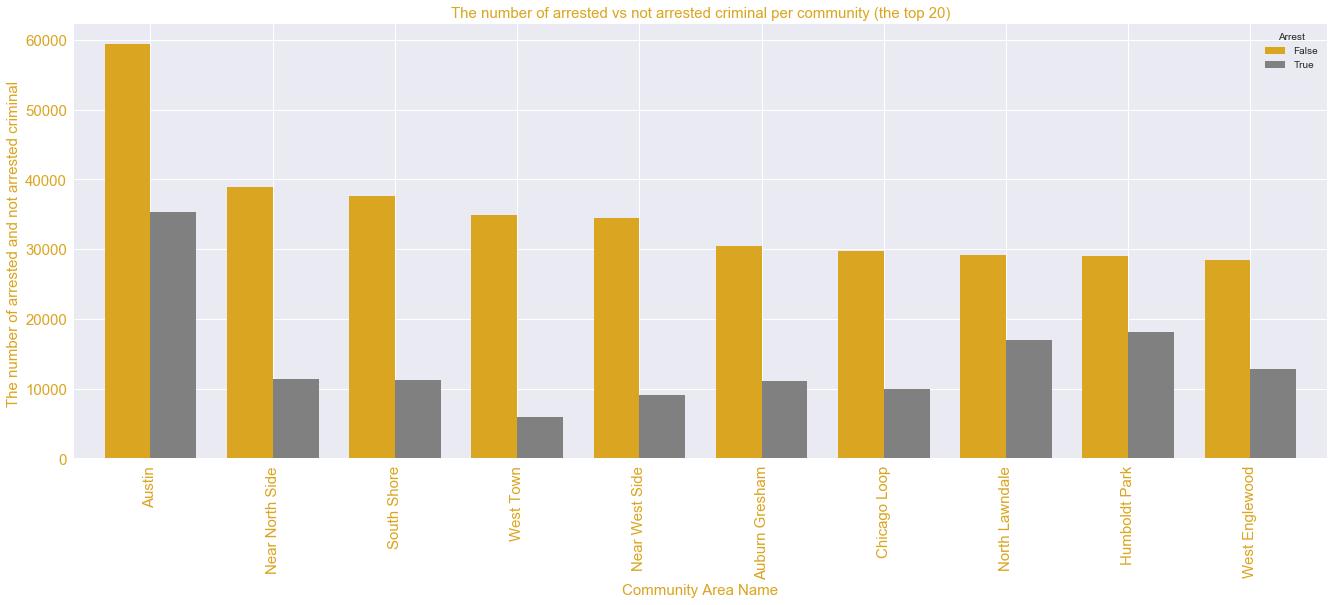

In [27]:
commuity_by_type  = crimes.pivot_table(values='Date', index='CommunityName', columns='Arrest', aggfunc=np.size).fillna(0)
commuity_by_type.sort_values(by = False, ascending=False).head(10).plot(kind= 'bar',width = 0.75 ,figsize=(20,8), color=('goldenrod','gray'))
plt.title("The number of arrested vs not arrested criminal per community (the top 20)", color= 'goldenrod', size= 15)
plt.xlabel('Community Area Name', color= 'goldenrod', size= 15)
plt.ylabel('The number of arrested and not arrested criminal ', color= 'goldenrod', size= 15)
plt.xticks( color= 'goldenrod', size= 15)
plt.yticks( color= 'goldenrod', size= 15)
plt.show()

### Arrested Status per a crime the top (10)

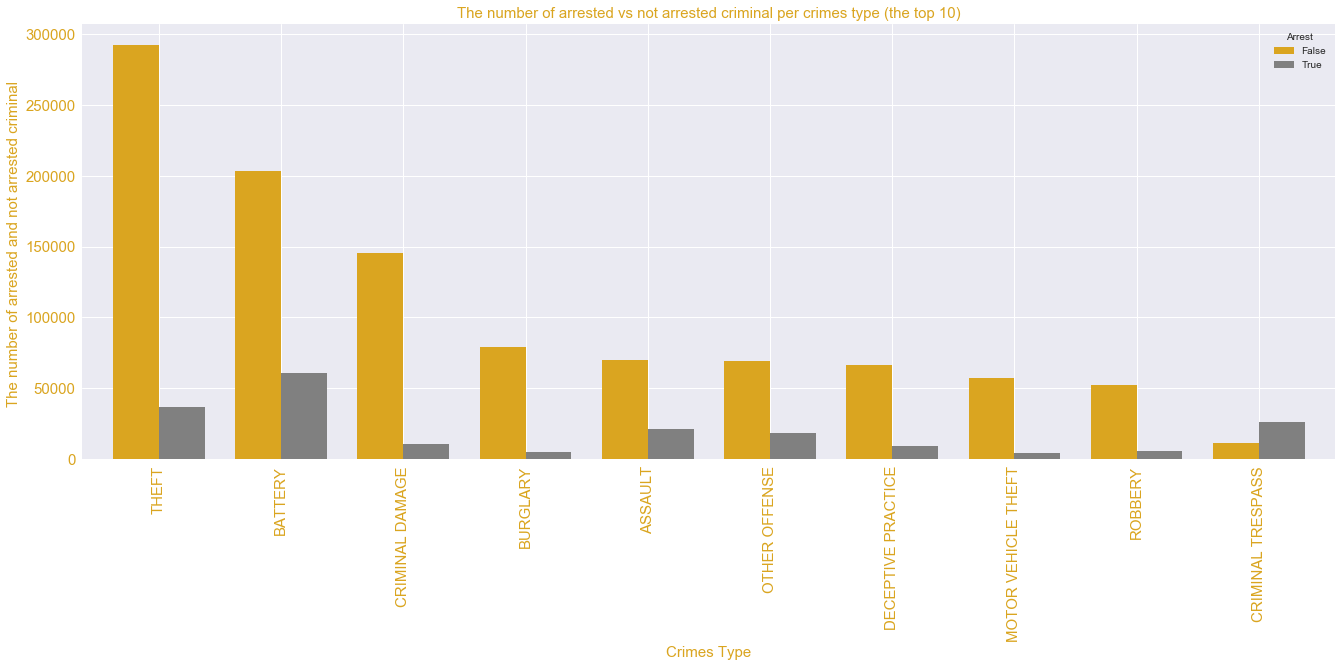

In [28]:
commuity_by_type  = crimes.pivot_table(values='Date', index='PrimaryType', columns='Arrest', aggfunc=np.size).fillna(0)
commuity_by_type.sort_values(by = False, ascending=False).head(10).plot(kind= 'bar',width = 0.75 ,figsize=(20,8), color=('goldenrod','gray'))
plt.title("The number of arrested vs not arrested criminal per crimes type (the top 10)",color= 'goldenrod', size= 15)
plt.xlabel('Crimes Type', color= 'goldenrod', size= 15)
plt.ylabel('The number of arrested and not arrested criminal ',color= 'goldenrod', size= 15)
plt.xticks( color= 'goldenrod', size= 15)
plt.yticks( color= 'goldenrod', size= 15)
plt.show()

### Arrested status per location description (the top 10)

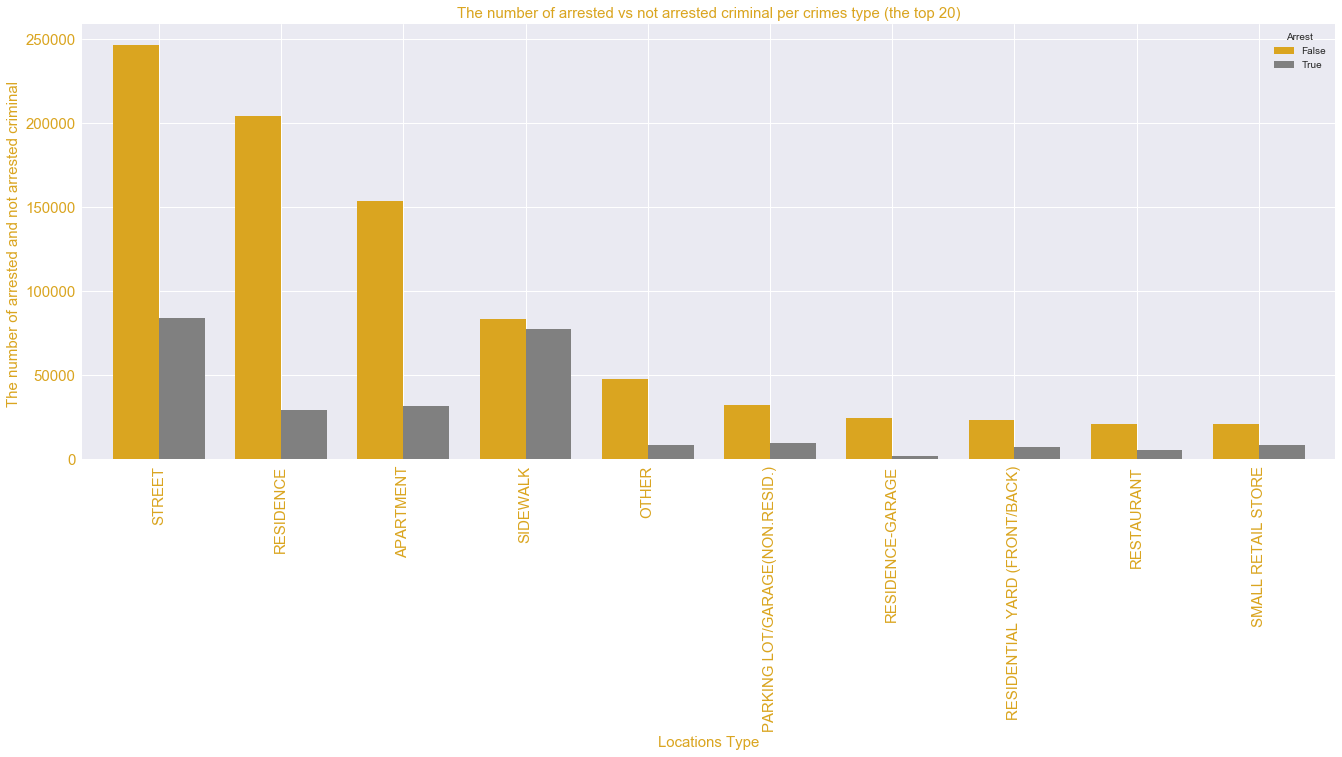

In [29]:
commuity_by_type  = crimes.pivot_table(values='Date', index='LocationDescription', columns='Arrest', aggfunc=np.size).fillna(0)
commuity_by_type.sort_values(by = False, ascending=False).head(10).plot(kind= 'bar',width = 0.75 ,figsize=(20,8), color=('goldenrod','gray'))
plt.title("The number of arrested vs not arrested criminal per crimes type (the top 20)",color= 'goldenrod', size= 15)
plt.xlabel('Locations Type',color= 'goldenrod', size= 15)
plt.ylabel('The number of arrested and not arrested criminal ',color= 'goldenrod', size= 15)
plt.xticks( color= 'goldenrod', size= 15)
plt.yticks( color= 'goldenrod', size= 15)
plt.show()

### Demographic Information 

#### What is the relationship between the average income of a community  and the number of crimes?

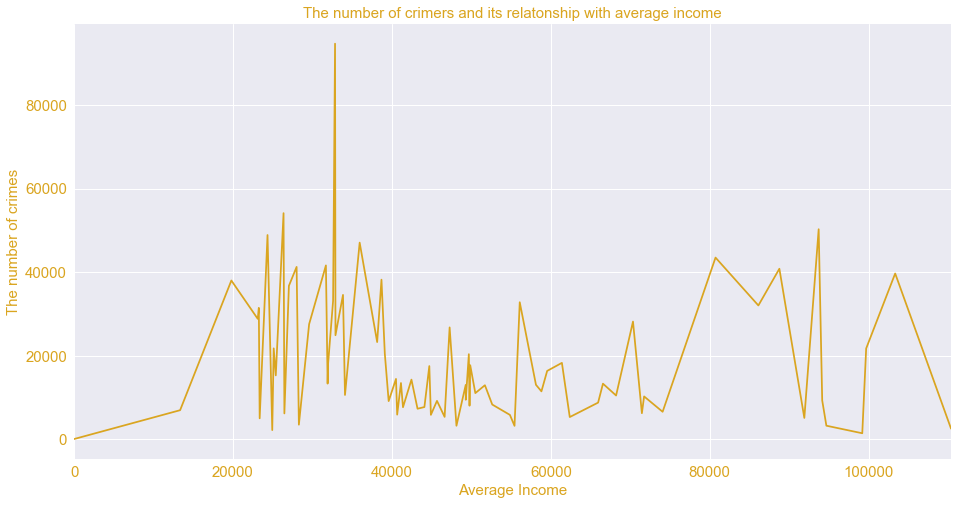

In [30]:
crimes.groupby('AverageIncome').PrimaryType.count().plot(figsize=(14,8),color='goldenrod')
plt.ylabel('The number of crimes', color= 'goldenrod', size= 15)
plt.xlabel('Average Income', color= 'goldenrod', size= 15)
plt.title('The number of crimers and its relatonship with average income',color= 'goldenrod', size= 15)
plt.yticks( color= 'goldenrod', size= 15)
plt.xticks( color= 'goldenrod', size= 15)
plt.show()

#### What is the relationship between the population of a community and the number of crimes?

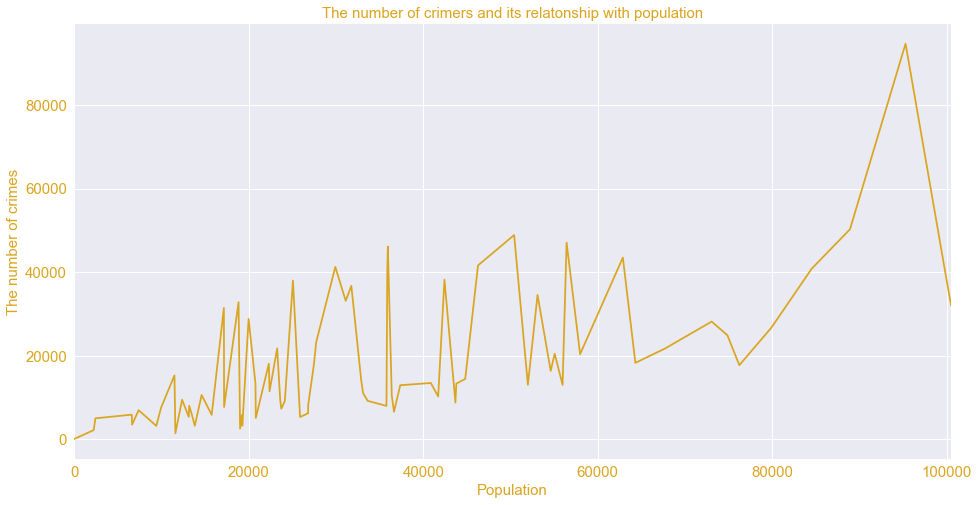

In [31]:
crimes.groupby('Population').PrimaryType.count().plot(figsize=(14,8),color='goldenrod')
plt.xlabel('Population', color= 'goldenrod', size= 15)
plt.ylabel('The number of crimes',color= 'goldenrod', size= 15)
plt.title('The number of crimers and its relatonship with population',color= 'goldenrod', size= 15)
plt.yticks( color= 'goldenrod', size= 15)
plt.xticks( color= 'goldenrod', size= 15)
plt.show()

#### What is the relationship between the total hosueholds of a community and the number of crimes?

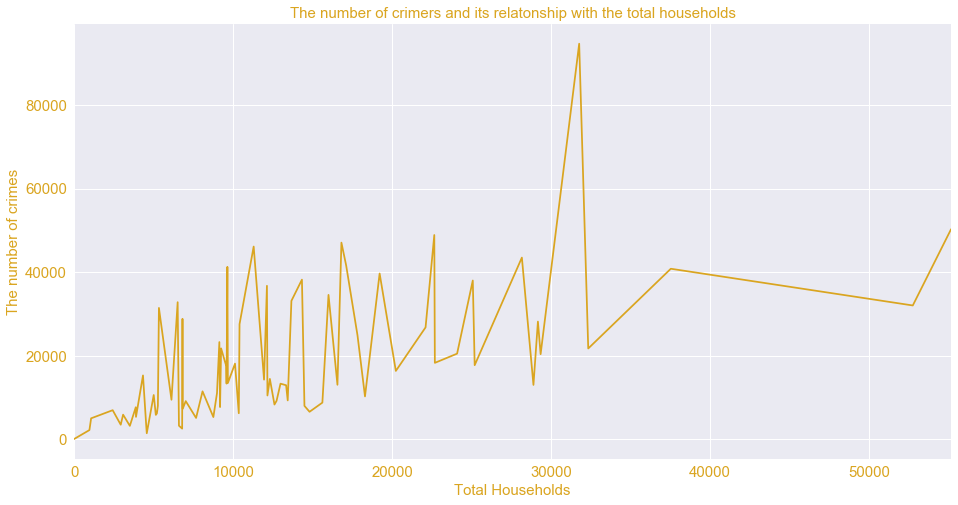

In [32]:
crimes.groupby('TotalHouseholds').PrimaryType.count().plot(figsize=(14,8),color='goldenrod')
plt.xlabel('Total Households', color= 'goldenrod', size= 15)
plt.ylabel('The number of crimes',color= 'goldenrod', size= 15)
plt.title('The number of crimers and its relatonship with the total households',color= 'goldenrod', size= 15)
plt.yticks( color= 'goldenrod', size= 15)
plt.xticks( color= 'goldenrod', size= 15)
plt.show()

#### What is the relationship between the  hosuehold size of a community and the number of crimes?

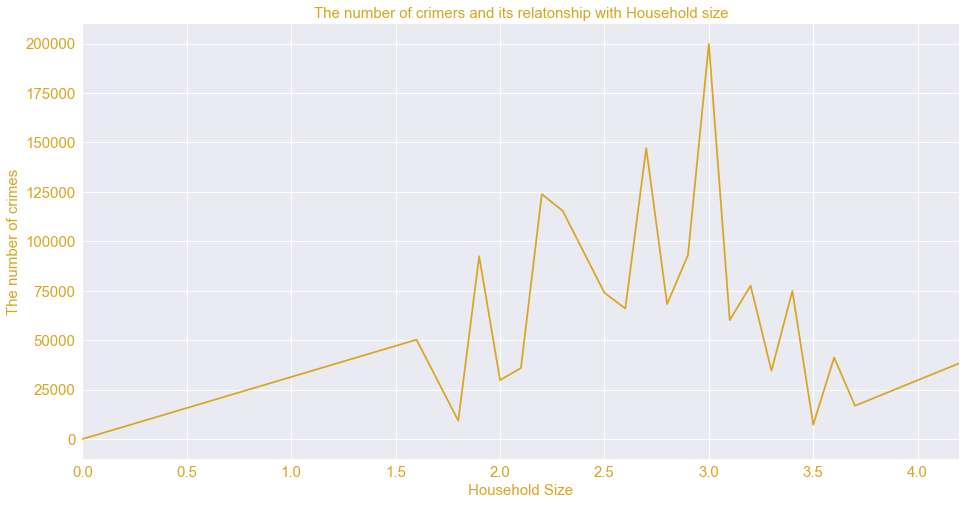

In [33]:
crimes.groupby('HouseholdsSize').PrimaryType.count().plot(figsize=(14,8),color='goldenrod')
plt.xlabel('Household Size', color= 'goldenrod', size= 15)
plt.ylabel('The number of crimes', color= 'goldenrod', size= 15)
plt.title('The number of crimers and its relatonship with Household size', color= 'goldenrod', size= 15)
plt.yticks( color= 'goldenrod', size= 15)
plt.xticks( color= 'goldenrod', size= 15)
plt.show()

#### What is the relationship between the median age of a community and the number of crimes?

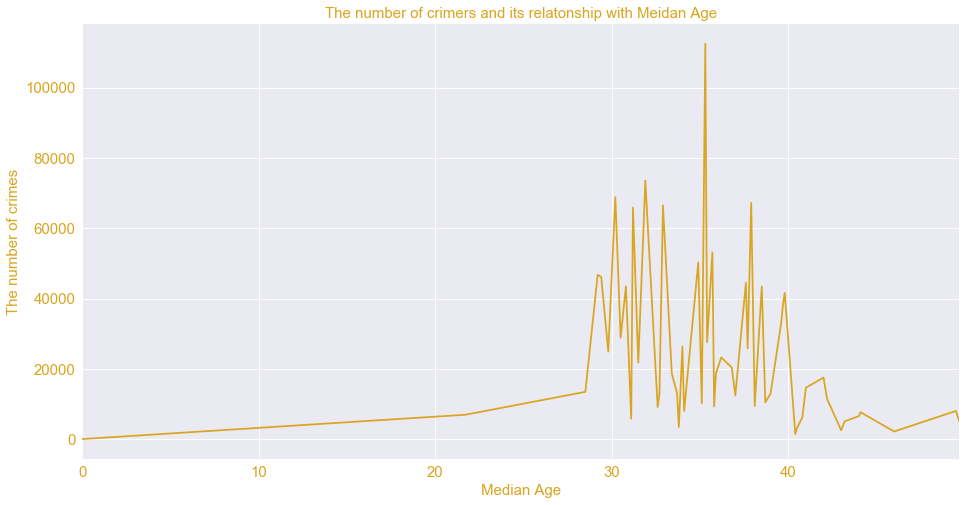

In [34]:
crimes.groupby('MedianAge').PrimaryType.count().plot(figsize=(14,8),color='goldenrod')
plt.xlabel('Median Age', color= 'goldenrod', size= 15)
plt.ylabel('The number of crimes',color= 'goldenrod', size= 15)
plt.title('The number of crimers and its relatonship with Meidan Age',color= 'goldenrod', size= 15)
plt.yticks( color= 'goldenrod', size= 15)
plt.xticks( color= 'goldenrod', size= 15)
plt.show()

#### What is the relationship between the median age of a community and the number of crimes?

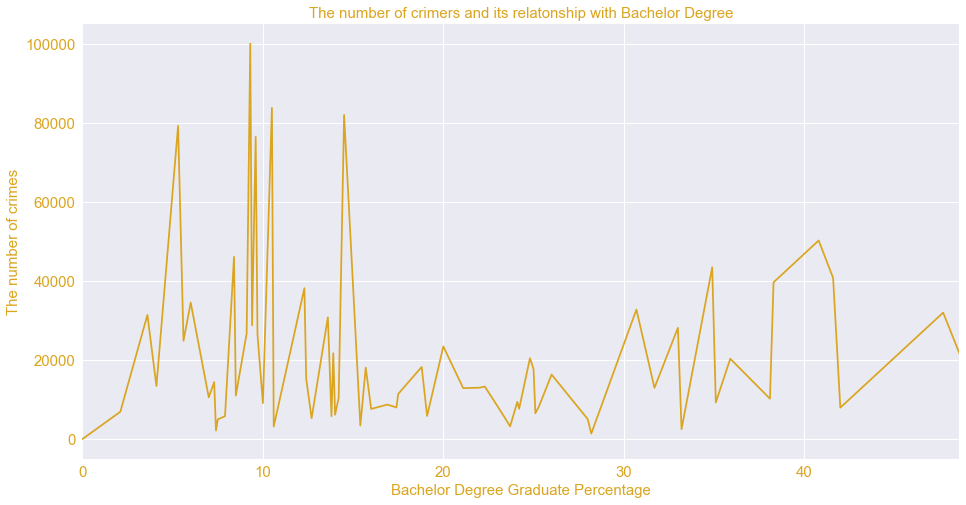

In [35]:
crimes.groupby('BachelorDegree').PrimaryType.count().plot(figsize=(14,8),color='goldenrod')
plt.xlabel('Bachelor Degree Graduate Percentage',color= 'goldenrod', size= 15)
plt.ylabel('The number of crimes',color= 'goldenrod', size= 15)
plt.title('The number of crimers and its relatonship with Bachelor Degree',color= 'goldenrod', size= 15)
plt.yticks( color= 'goldenrod', size= 15)
plt.xticks( color= 'goldenrod', size= 15)
plt.show()

In [36]:
#### What is the relationship between the Empoloyed people of a community and the number of crimes?

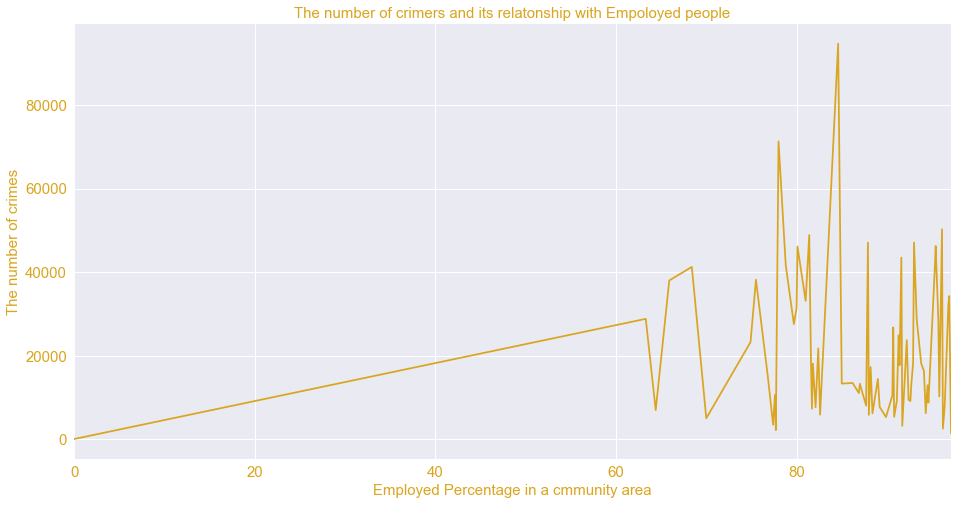

In [37]:
crimes.groupby('Employed').PrimaryType.count().plot(figsize=(14,8),color='goldenrod')
plt.xlabel('Employed Percentage in a cmmunity area', color= 'goldenrod', size= 15)
plt.ylabel('The number of crimes', color= 'goldenrod', size= 15)
plt.title('The number of crimers and its relatonship with Empoloyed people', color= 'goldenrod', size= 15)
plt.yticks( color= 'goldenrod', size= 15)
plt.xticks( color= 'goldenrod', size= 15)
plt.show()